## Predicting stock prices using historical data

We'll use a dataset of stock prices and build both an RNN and an LSTM model to predict the next day's closing price.

## Dataset

In [1]:
!pip install yfinance

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error , r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN , LSTM , Dense
import matplotlib.pyplot as plt

## Fetching Data
Let's use Apple (AAPL) stock data for this example.

In [3]:
# Downloading the dtock data
df = yf.download('AAPL',start='2020-01-01' , end='2024-07-05')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251152,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826866,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484329,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200
...,...,...,...,...,...,...
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900


In [4]:
# Scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))
print(scaled_data)


[[0.11480291]
 [0.11039088]
 [0.11397185]
 ...
 [0.97098951]
 [0.99226388]
 [1.        ]]


In [5]:
# Creating sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:i + sequence_length]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

In [7]:
X , y

(array([[[0.11480291],
         [0.11039088],
         [0.11397185],
         ...,
         [0.03195686],
         [0.05147849],
         [0.0353112 ]],
 
        [[0.11039088],
         [0.11397185],
         [0.11184144],
         ...,
         [0.05147849],
         [0.0353112 ],
         [0.04599369]],
 
        [[0.11397185],
         [0.11184144],
         [0.11909404],
         ...,
         [0.0353112 ],
         [0.04599369],
         [0.04520798]],
 
        ...,
 
        [[0.68130792],
         [0.68590121],
         [0.67907164],
         ...,
         [0.94983604],
         [0.95497335],
         [0.93394069]],
 
        [[0.68590121],
         [0.67907164],
         [0.68644514],
         ...,
         [0.95497335],
         [0.93394069],
         [0.97098951]],
 
        [[0.67907164],
         [0.68644514],
         [0.67502227],
         ...,
         [0.93394069],
         [0.97098951],
         [0.99226388]]]),
 array([[0.04599369],
        [0.04520798],
        [0.

In [9]:
# Splitting into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [10]:
# Reshaping for RNN/LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [11]:
# Building and training RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
22/22 [==============================] - 4s 71ms/step - loss: 0.0257 - val_loss: 4.2693e-04
Epoch 2/20
22/22 [==============================] - 2s 83ms/step - loss: 0.0015 - val_loss: 4.4249e-04
Epoch 3/20
22/22 [==============================] - 1s 34ms/step - loss: 6.0914e-04 - val_loss: 4.8636e-04
Epoch 4/20
22/22 [==============================] - 1s 35ms/step - loss: 4.6064e-04 - val_loss: 4.6461e-04
Epoch 5/20
22/22 [==============================] - 1s 36ms/step - loss: 4.1137e-04 - val_loss: 2.9312e-04
Epoch 6/20
22/22 [==============================] - 1s 35ms/step - loss: 4.1614e-04 - val_loss: 3.0900e-04
Epoch 7/20
22/22 [==============================] - 1s 35ms/step - loss: 3.9253e-04 - val_loss: 2.8318e-04
Epoch 8/20
22/22 [==============================] - 1s 36ms/step - loss: 3.9458e-04 - val_loss: 4.8360e-04
Epoch 9/20
22/22 [==============================] - 1s 36ms/step - loss: 4.2973e-04 - val_loss: 4.0197e-04
Epoch 10/20
22/22 [==========================

In [12]:
# Building and training LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)


Epoch 1/40
22/22 [==============================] - 3s 75ms/step - loss: 0.0673 - val_loss: 0.0181
Epoch 2/40
22/22 [==============================] - 1s 63ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 3/40
22/22 [==============================] - 2s 83ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/40
22/22 [==============================] - 2s 109ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 5/40
22/22 [==============================] - 1s 62ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/40
22/22 [==============================] - 1s 62ms/step - loss: 9.4222e-04 - val_loss: 9.5882e-04
Epoch 7/40
22/22 [==============================] - 1s 62ms/step - loss: 8.8692e-04 - val_loss: 8.9461e-04
Epoch 8/40
22/22 [==============================] - 1s 62ms/step - loss: 8.5603e-04 - val_loss: 8.3397e-04
Epoch 9/40
22/22 [==============================] - 1s 61ms/step - loss: 8.3449e-04 - val_loss: 9.1582e-04
Epoch 10/40
22/22 [==============================] - 1s 63ms/step - loss: 8.

In [13]:
# Predictions
predicted_rnn = model_rnn.predict(X_test)
predicted_lstm = model_lstm.predict(X_test)

7/7 [==============================] - 0s 10ms/step


In [14]:
# Inverse scaling to get actual prices
predicted_rnn = scaler.inverse_transform(predicted_rnn)
predicted_lstm = scaler.inverse_transform(predicted_lstm)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


In [15]:
# Calculate MSE
mse_rnn = mean_squared_error(y_test_actual, predicted_rnn)
mse_lstm = mean_squared_error(y_test_actual, predicted_lstm)
print(f'RNN MSE: {mse_rnn}')
print(f'LSTM MSE: {mse_lstm}')

RNN MSE: 11.031676724248786
LSTM MSE: 14.8739438088968


In [16]:
r2score_rnn = r2_score(y_test_actual, predicted_rnn)
r2score_lstm = r2_score(y_test_actual, predicted_lstm)
print(f'RNN R2Score: {r2score_rnn}')
print(f'LSTM R2Score: {r2score_lstm}')

RNN R2Score: 0.9218609298768329
LSTM R2Score: 0.8946455586631978


In [17]:
# Predict the next day's price using both models
last_sequence = scaled_data[-sequence_length:]
last_sequence = last_sequence.reshape((1, sequence_length, 1))

next_day_rnn = model_rnn.predict(last_sequence)
next_day_lstm = model_lstm.predict(last_sequence)

next_day_rnn = scaler.inverse_transform(next_day_rnn)
next_day_lstm = scaler.inverse_transform(next_day_lstm)

print(f'Predicted next day price (RNN): {next_day_rnn[0][0]}')
print(f'Predicted next day price (LSTM): {next_day_lstm[0][0]}')

1/1 [==============================] - 0s 136ms/step
Predicted next day price (RNN): 217.692626953125
Predicted next day price (LSTM): 218.74867248535156


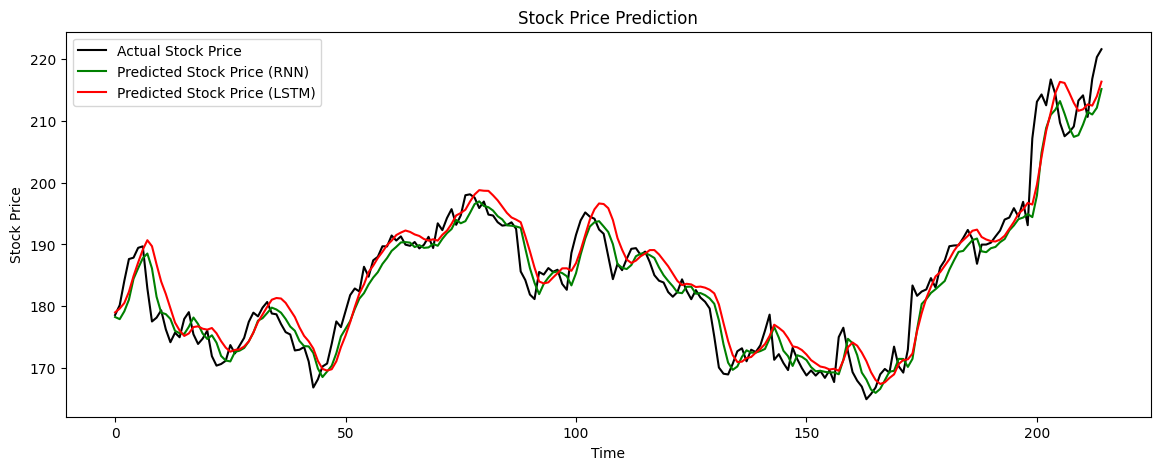

In [18]:
# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='black', label='Actual Stock Price')
plt.plot(predicted_rnn, color='green', label='Predicted Stock Price (RNN)')
plt.plot(predicted_lstm, color='red', label='Predicted Stock Price (LSTM)')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()